<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 0</h2>

<b> Due on: January 29th, 2024 at 23:59 ADT</b>
</center>



## Distributions (5 pts)

In this question the black box functions are functions that are provided to you which you do not need to devote time to understanding or modify in any way. Each function will return a list of `n` random floating point numbers on the interval [0, 1], where `n` is an integer parameter of the function.

(a) Given the three black box generator functions below, compute the expected value and variance of the values returned by each function.

In [13]:

import numpy as np

rng = np.random.default_rng(261325928446694869112420952826835439449)

def bb1(n):
    return rng.random(n)

def bb2(n):
    return rng.triangular(0, 0.87645, 1, n)

def bb3(n):
    return rng.power(0.587621, n)

In [14]:
def expCalc (list, length):
    exp = sum(list) / length
    return exp

def varCalc (list, length):
    var = 0
    exp = expCalc(list, length)
    for i in list:
        var += (i-exp) ** 2
    var = var / length
    return var 

length = 100000
list1 = bb1(length)

print("For BB1 the expected value is " + str(expCalc(list1, length)))
print("For BB1 the variance is " + str(varCalc(list1, length)))

list2 = bb2(length)

print("For BB2 the expected value is " + str(expCalc(list2, length)))
print("For BB2 the variance is " + str(varCalc(list2, length)))

list3 = bb3(length)

print("For BB3 the expected value is " + str(expCalc(list3, length)))
print("For BB3 the variance is " + str(varCalc(list3, length)))




For BB1 the expected value is 0.4993566731095099
For BB1 the variance is 0.0834964553582436
For BB2 the expected value is 0.6246729594491011
For BB2 the variance is 0.04978939321622147
For BB3 the expected value is 0.37005884125513266
For BB3 the variance is 0.09029142623689304


**Enter your results into the table below**:

|                	| bb1 	| bb2 	| bb3 	|
|----------------	|-----	|-----	|-----	|
| Expected Value 	|   0.50  	|   0.625  	|   0.37  	|
| Variance       	|    0.083 	|   0.0495  	|    0.090 	|

(b) Given the two black box mapping functions below, `bbf1(d)` and `bbf2(d)`, compute the expected value of each function with respect to each generator function.
>Note: Each function takes as input a `numpy.ndarray`, `d`, of length `l` and returns its output in the same format.

In [15]:
###################### DO NOT EDIT ######################
def bbf1(d):
    return -11.81 * np.square(d) + 11.43785 * d - 2.097486

def bbf2(d):
    return 2.564**d - 0.20989

In [16]:
length = 100000
a = bb1 (length)
b = bb2 (length)
c = bb3 (length)

lista1 = bbf1(a)
lista2 = bbf2(a)
listb1 = bbf1(b)
listb2 = bbf2(b)
listc1 = bbf1(c)
listc2 = bbf2(c)

print ("Expected value of bbf1 given bb1 is " + str(expCalc(lista1, length)))
print ("Expected value of bbf2 given bb1 is " + str(expCalc(lista2, length)))
print ("Expected value of bbf1 given bb2 is " + str(expCalc(listb1, length)))
print ("Expected value of bbf2 given bb2 is " + str(expCalc(listb2, length)))
print ("Expected value of bbf1 given bb3 is " + str(expCalc(listc1, length)))
print ("Expected value of bbf2 given bb3 is " + str(expCalc(listc2, length)))

Expected value of bbf1 given bb1 is -0.31894188986963334
Expected value of bbf2 given bb1 is 1.450333376448088
Expected value of bbf1 given bb2 is -0.15207784573406147
Expected value of bbf2 given bb2 is 1.6305731590177748
Expected value of bbf1 given bb3 is -0.5457273253900787
Expected value of bbf2 given bb3 is 1.2646293753813092


**Enter your results into the table below**:

|     	| bbf1 	| bbf2 	|
|-----	|------	|------	|
| bb1 	|   -0.315   	|    1.45  	|
| bb2 	|    -0.149  	|   1.630   	|
| bb3 	|   -0.545   	|   1.267   	|


(c) Compute the entropy of each of the distributions produced by `bb1`, `bb2`, and `bb3`.

In [17]:

def entropy (listx, length):
    prob = [0 for i in range(100)]
    for i in range(100):
        for j in range(length):
            if i/100.00 < listx[j] and listx[j] < i/100.00 + 0.01:
                prob[i] += 1
        prob[i] = prob[i]/length
    
    entropy = 0
    for i in range(100):
        entropy += - prob[i] * np.log(prob[i])

    return entropy

length = 10000
listx = bb1(length)
listy = bb2(length)
listz = bb3(length)
print("Entropy of bb1 is: " + str(entropy(listx, length)))
print("Entropy of bb2 is: " + str(entropy(listy, length)))
print("Entropy of bb3 is: " + str(entropy(listz, length)))




Entropy of bb1 is: 4.6007133545287076
Entropy of bb2 is: 4.404698090357701
Entropy of bb3 is: 4.44462301943587


| Entropy        	| 1    	|
|-------------	|------	|
|  bb1	| 4.604 	| 
| bb2 	| 4.412 	| 
| bb3 	| 4.445 	| 

## Sample Generation (5 pts)

(a) Write a function that uses the function `random_uniform_distribution(n)` (which generates data from a uniform distribution on `[0, 10)`) to generate samples which simulates the rolling of two six-sided dice. One is fair, meaning it has equal probability of landing on any side, and the other is loaded, meaning that it has the probability of landing on each side shown in the table below:

| Side        	| 1    	| 2    	| 3    	| 4    	| 5   	| 6    	|
|-------------	|------	|------	|------	|------	|-----	|------	|
| Probability 	| 0.17 	| 0.27 	| 0.17 	| 0.17 	| 0.05	| 0.17 	|

In [18]:

def random_uniform_distribution(n):
    rng = np.random.default_rng()
    return 10 * rng.random(n)

In [19]:
samplesize = 100000
fairdice = np.floor(random_uniform_distribution(samplesize)*6/10) + 1
print(fairdice)

rannumber = random_uniform_distribution(samplesize)
loadeddice = [0 for i in range(samplesize)]
for i in range(samplesize):
    if rannumber[i] < 1.7:
        loadeddice[i] = 1
    elif rannumber[i] < 4.4:
        loadeddice[i] = 2
    elif rannumber[i] < 6.1:
        loadeddice[i] = 3
    elif rannumber[i] < 7.8:
        loadeddice[i] = 4
    elif rannumber[i] < 8.3:
        loadeddice[i] = 5
    else:
        loadeddice[i] = 6
print(loadeddice)

[3. 3. 2. ... 2. 4. 6.]
[6, 2, 4, 2, 5, 5, 6, 2, 1, 6, 3, 2, 6, 3, 6, 3, 4, 1, 3, 5, 3, 1, 3, 3, 1, 3, 4, 3, 4, 6, 2, 4, 5, 4, 3, 4, 2, 5, 1, 2, 6, 3, 6, 2, 6, 4, 2, 6, 6, 3, 2, 2, 6, 2, 3, 2, 2, 4, 2, 5, 4, 3, 2, 4, 2, 4, 3, 1, 1, 2, 3, 2, 4, 6, 4, 2, 6, 6, 2, 3, 2, 2, 6, 2, 1, 3, 4, 2, 2, 2, 2, 6, 1, 2, 2, 6, 1, 4, 6, 6, 6, 4, 2, 4, 2, 1, 2, 5, 4, 3, 5, 2, 1, 3, 1, 3, 2, 1, 2, 3, 3, 4, 6, 5, 2, 3, 4, 3, 6, 2, 3, 1, 4, 4, 1, 1, 6, 2, 2, 6, 4, 4, 2, 2, 2, 6, 4, 2, 2, 1, 4, 4, 2, 6, 1, 4, 6, 6, 3, 4, 4, 2, 6, 6, 4, 4, 5, 3, 2, 2, 4, 3, 2, 6, 2, 2, 3, 3, 1, 1, 6, 1, 4, 2, 6, 5, 6, 3, 4, 4, 2, 6, 1, 3, 1, 4, 4, 4, 6, 3, 2, 3, 2, 2, 2, 5, 2, 2, 4, 1, 2, 3, 6, 5, 2, 1, 6, 2, 2, 6, 6, 4, 6, 6, 1, 2, 1, 3, 4, 6, 2, 4, 1, 6, 1, 4, 3, 3, 1, 1, 1, 2, 6, 6, 5, 3, 2, 1, 4, 1, 5, 2, 4, 4, 4, 3, 6, 6, 2, 2, 3, 1, 6, 6, 2, 3, 3, 4, 5, 4, 1, 6, 2, 2, 1, 2, 1, 6, 2, 2, 4, 2, 3, 2, 2, 5, 4, 6, 6, 2, 1, 1, 6, 3, 3, 2, 4, 3, 6, 3, 6, 3, 4, 5, 6, 2, 4, 2, 2, 6, 6, 6, 2, 3, 2, 1, 2, 1, 4, 3, 1, 3, 1, 1, 3, 

(b) Make a plot of your new distributions below, including one plot for each die. An example plot of the distribution for a coin flip where the coin is loaded 75:25 is shown here.

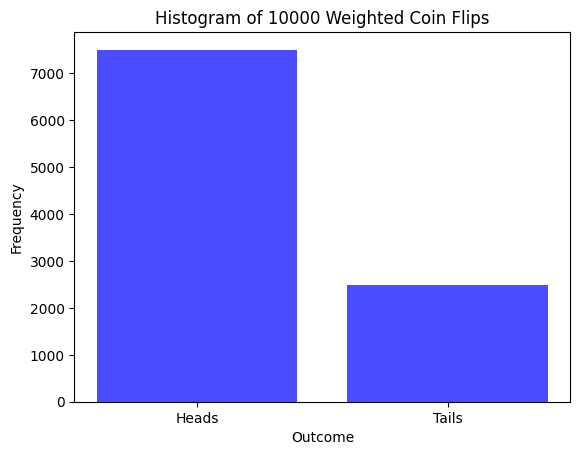


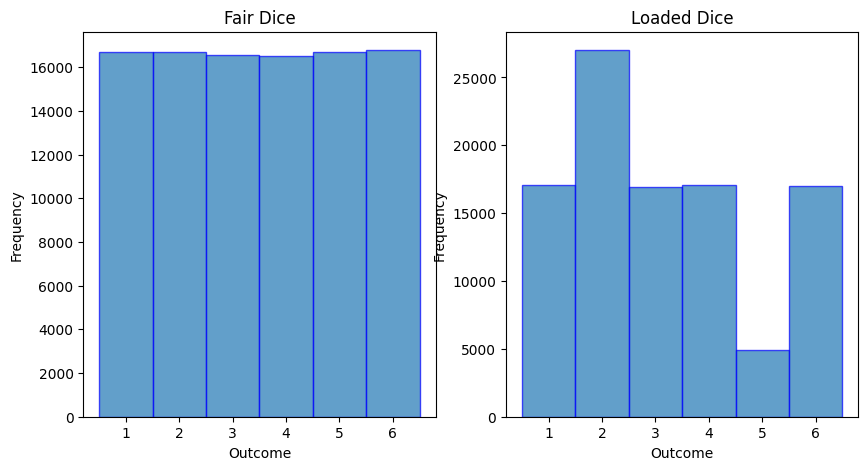

In [20]:
import matplotlib.pyplot as plot
plot.figure(figsize=(10, 5))

plot.subplot(1, 2, 1)
plot.hist(fairdice, bins=np.arange(1, 8), align='left', edgecolor='blue', alpha=0.7)
plot.title("Fair Dice")
plot.xlabel("Outcome")
plot.ylabel("Frequency")

plot.subplot(1, 2, 2)
plot.hist(loadeddice, bins=np.arange(1, 8), align='left', edgecolor='blue', alpha=0.7)
plot.title("Loaded Dice")
plot.xlabel("Outcome")
plot.ylabel("Frequency")

plot.show()

## Synthetic Clustered Dataset (3 pts)

a) Use numpy’s gaussian number generator to generate a “synthetic” dataset of the 3 circular clusters with means (10, 0), (0, 6) and (3, 1).

In [21]:
pointspercluster = 1000
mean = [(10,0), (0,6), (3,1)]
data = []
for i in mean:
    x = np.random.normal (i[0], 1, pointspercluster)
    y = np.random.normal (i[1], 1, pointspercluster)
    data.append((x,y))

print(data)

[(array([10.28296934,  9.50879226,  9.89229811,  9.81649735,  8.93790429,
        9.30378996, 11.34140457, 10.10475558, 10.17281641, 10.85624749,
       10.17432376,  8.72526276,  9.25658277,  9.40634403, 10.32343077,
       11.41982672,  9.52977656, 11.14791505,  7.82012423,  7.70445167,
        8.28936787, 10.11158856,  9.62045925, 10.41279035,  9.45554161,
        9.64017188, 11.4060614 , 11.04080662,  8.88222821, 11.08255164,
       11.36319452,  9.54044425, 10.95583527, 10.55184448,  9.96103453,
        9.9034362 , 10.17498319,  9.09445401,  9.80849601,  9.30059816,
       10.814004  ,  9.24851558, 10.87599961,  9.57074576,  8.70208693,
        9.41301172,  9.97107421,  9.95770605, 10.66440685, 10.714443  ,
        8.89929832, 10.72880143, 10.19543252, 10.26759824, 10.23302893,
       10.20446977, 10.38733405, 11.12454119,  8.77183294,  7.62228015,
        8.65068698,  9.68468101,  8.89404961, 11.62307277,  8.84572722,
       10.69191985,  9.98697833, 11.25483243,  9.7363819 , 10.

b) Plot your dataset from a) -- it should look like the plot shown.

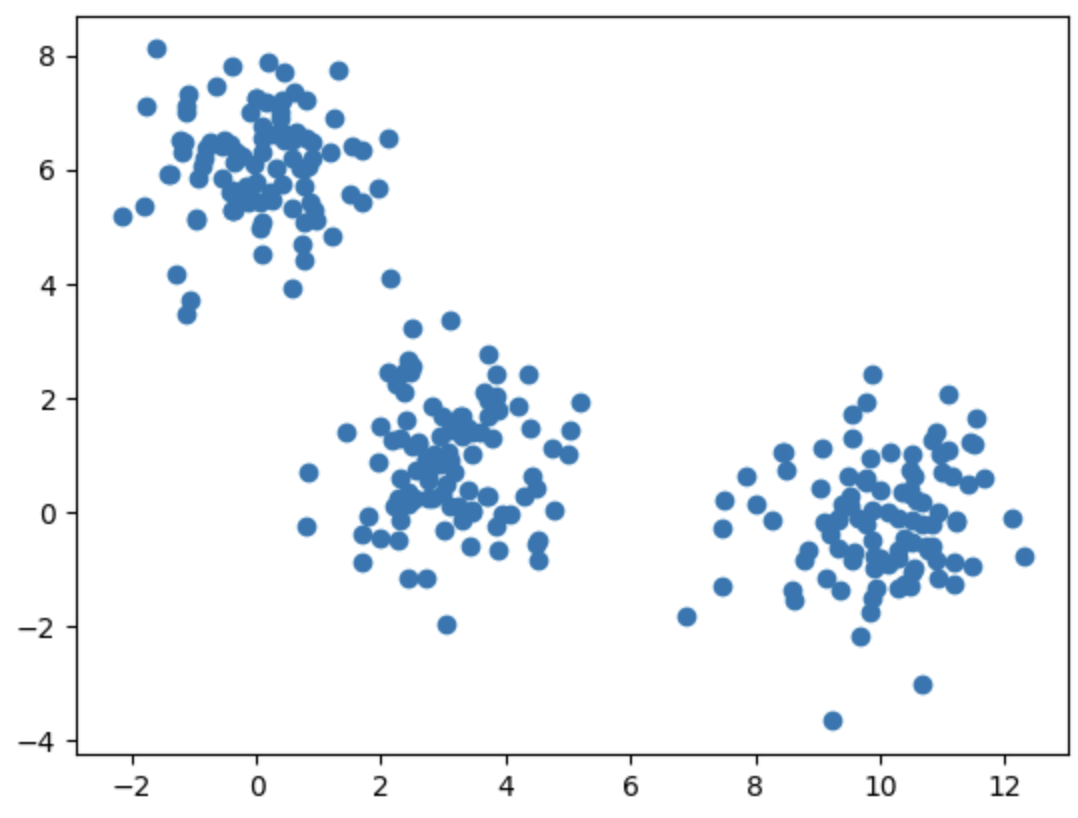



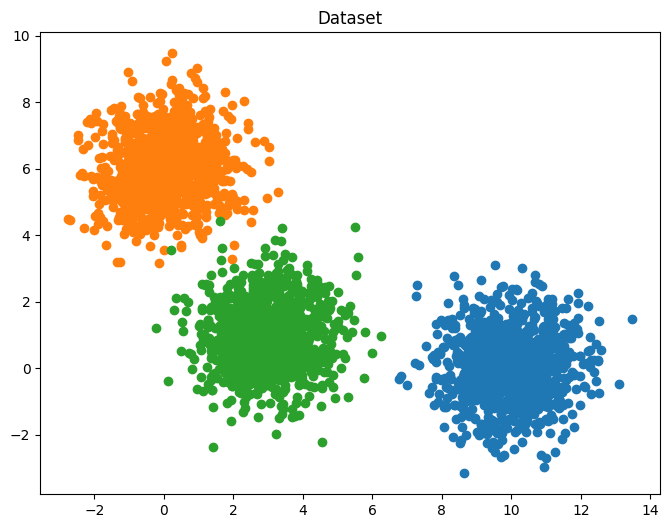

In [22]:
plot.figure(figsize=(8, 6))

for i, cluster in enumerate(data):
    plot.scatter(cluster[0], cluster[1])

plot.title("Dataset")

plot.show()

## KNN (5 pts)

Implement the k-nearest neighbours algorithm.

In [23]:
# Your code here
from collections import Counter
def calcEuclideanDist (valPoint, trainPoint):
  squaredDistance = np.sum((valPoint - trainPoint[:-1]) ** 2)
  distance = np.sqrt(squaredDistance)
  return distance


def knn_classifier(train, val, k):

  pred = []
  for valuepoint in val:
    #Calculating the distances to each point
    distances = []
    for trainpoint in train:
      distances.append(calcEuclideanDist(valuepoint,trainpoint))

    knnindices = np.argsort(distances)[:k]

    knnlabel = []
    for i in knnindices:
      knnlabel.append(train[i][-1])
    
    most_common_label = Counter(knnlabel).most_common(1)[0][0]
    pred.append(most_common_label)
    

  return pred


train = np.array([[1.0, 3.0, 1], [3.0, 4.0, 1], [100.0, 3.0, 3], [3.0, 5.0, 1], [10.0, 2.0, 2]])
val = np.array([[11.0, 2.0], [3.0, 4.0]])
k = 2
print(knn_classifier(train, val, k))

[2.0, 1.0]
